<a href="https://colab.research.google.com/github/anudeepayina/CricketTracker/blob/master/Data_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from numpy import save
from sklearn.model_selection import train_test_split

In [ ]:
#load data
forward_defensive_Pd = pd.read_csv("Forward Defensive Data.csv")
backfoot_defensive_Pd = pd.read_csv("Backfoot Defensive Data.csv")
cover_drive_Pd = pd.read_csv("Cover Drive Data.csv")

Fill "na" with zeros

In [ ]:
cover_drive_Pd.fillna(0,inplace=True)
forward_defensive_Pd.fillna(0,inplace=True)
backfoot_defensive_Pd.fillna(0,inplace=True)

Reset index

In [ ]:
cd_test = cover_drive_Pd.reset_index()
cd_test.drop("index",axis=1,inplace=True)
fd_test = forward_defensive_Pd.reset_index()
fd_test.drop("index",axis=1,inplace=True)
bd_test = backfoot_defensive_Pd.reset_index()
bd_test.drop("index",axis=1,inplace=True)

Split data into each video

In [ ]:
zero_index_cd = cd_test[cd_test["timestamp"]==0].index.to_list()
zero_index_n0_cd =  zero_index_cd[1:]
zero_index_n0_cd.append(len(cd_test))
zero_index_fd = fd_test[fd_test["timestamp"]==0].index.to_list()
zero_index_n0_fd =  zero_index_fd[1:]
zero_index_n0_fd.append(len(fd_test))
zero_index_bd = bd_test[bd_test["timestamp"]==0].index.to_list()
zero_index_n0_bd =  zero_index_bd[1:]
zero_index_n0_bd.append(len(bd_test))

In [ ]:
cd_test = cd_test.drop("timestamp",axis=1)
fd_test = fd_test.drop("timestamp",axis=1)
bd_test = bd_test.drop("timestamp",axis=1)

Make position at each timestamp relative to beginning position

In [ ]:
for item, num in zip (zero_index_cd,zero_index_n0_cd):
    cd_test.loc[item:num,:] = cd_test.loc[item:num,:] - cd_test.loc[item,:]
for item, num in zip (zero_index_bd,zero_index_n0_bd):
    bd_test.loc[item:num,:] = bd_test.loc[item:num,:] - bd_test.loc[item,:]
for item, num in zip (zero_index_fd,zero_index_n0_fd):
    fd_test.loc[item:num,:] = fd_test.loc[item:num,:] - fd_test.loc[item,:]

In [ ]:
cover_drive = {}
forward_defensive = {}
backfoot_defensive = {}
for index, num in zip(zero_index_cd,zero_index_n0_cd):
  cover_drive["cd_" + str(index)] = cd_test.iloc[index:num,:]
for index, num in zip(zero_index_fd,zero_index_n0_fd):
  forward_defensive["fd_" + str(index)] = fd_test.iloc[index:num,:]
for index, num in zip(zero_index_bd,zero_index_n0_bd):
  backfoot_defensive["bd_" + str(index)] = bd_test.iloc[index:num,:]  

In [ ]:
sequence_cd = []
sequence_fd = []
sequence_bd = []
for key in cover_drive:
  sequence_cd.append(cover_drive[key].values)
for key in forward_defensive:
  sequence_fd.append(forward_defensive[key].values)
for key in backfoot_defensive:
  sequence_bd.append(backfoot_defensive[key].values)

Format data so that each has video has equal length

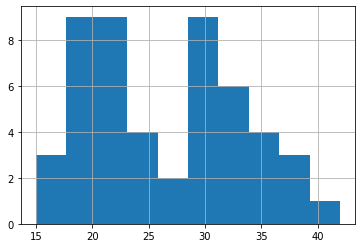

In [ ]:
len_sequences = []
for one_seq in sequence_fd:
    len_sequences.append(len(one_seq))
pd.Series(len_sequences).hist()

In [ ]:
#Padding the sequence with the values in last row to max length
to_pad = 31
new_seq = []
for one_seq in sequence_cd:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
   
    to_concat = np.repeat(one_seq[-1], n).reshape(34, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq_cd = np.stack(new_seq)

#truncate the sequence to length 24
from keras.preprocessing import sequence
seq_len = 24
final_seq_cd=sequence.pad_sequences(final_seq_cd, maxlen=seq_len, padding='post', dtype='float', truncating='pre')

In [ ]:
#Padding the sequence with the values in last row to max length
to_pad = 35
new_seq = []
for one_seq in sequence_bd:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
   
    to_concat = np.repeat(one_seq[-1], n).reshape(34, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq_bd = np.stack(new_seq)

#truncate the sequence to length 24
from keras.preprocessing import sequence
seq_len = 24
final_seq_bd=sequence.pad_sequences(final_seq_bd, maxlen=seq_len, padding='post', dtype='float', truncating='pre')

In [ ]:
#Padding the sequence with the values in last row to max length
to_pad = 42
new_seq = []
for one_seq in sequence_fd:
    len_one_seq = len(one_seq)
    last_val = one_seq[-1]
    n = to_pad - len_one_seq
   
    to_concat = np.repeat(one_seq[-1], n).reshape(34, n).transpose()
    new_one_seq = np.concatenate([one_seq, to_concat])
    new_seq.append(new_one_seq)
final_seq_fd = np.stack(new_seq)

#truncate the sequence to length 24
from keras.preprocessing import sequence
seq_len = 24
final_seq_fd=sequence.pad_sequences(final_seq_fd, maxlen=seq_len, padding='post', dtype='float', truncating='pre')

**Create label data**

In [ ]:
cd_label = ["cover drive"]*50
fd_label = ["forward defensive"]*50
bd_label = ["backfoot defensive"]*50
label_data = bd_label + cd_label + fd_label
len(label_data)

150

In [ ]:
final_seq_bd = np.array(final_seq_bd)
final_seq_cd = np.array(final_seq_cd)
final_seq_fd = np.array(final_seq_fd)

In [ ]:
final_seq_train = np.vstack((final_seq_bd,final_seq_cd,final_seq_fd))

In [ ]:
final_seq_train.shape

(150, 24, 34)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(final_seq_train,label_data,test_size = 0.25,random_state=3)

In [ ]:
len(x_train)

112

**Save Files**

In [ ]:
save("x_train",x_train)
save("x_test",x_test)
save("y_train",y_train)
save("y_test",y_test)